In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

# 例2.3

In [2]:
filename = 'eg2d3data.xls'
data = pd.read_excel(filename)
data.head()

,y,x1,x2,x3
0,33.2,3.5,9,6.1
1,40.3,5.3,20,6.4
2,38.7,5.1,18,7.4
3,46.8,5.8,33,6.7
4,41.4,4.2,31,7.5


In [3]:
# 描述性分析
data.describe()

,y,x1,x2,x3
count,24.000000,24.000000,24.000000,24.000000
mean,39.500000,5.320833,24.958333,5.987500
std,5.474288,1.269707,11.222955,1.303611
min,30.100000,3.100000,5.000000,3.500000
25%,35.700000,4.425000,17.250000,5.000000
50%,38.850000,5.400000,25.000000,6.000000
75%,42.925000,6.050000,33.250000,7.000000
max,52.900000,8.000000,47.000000,8.300000


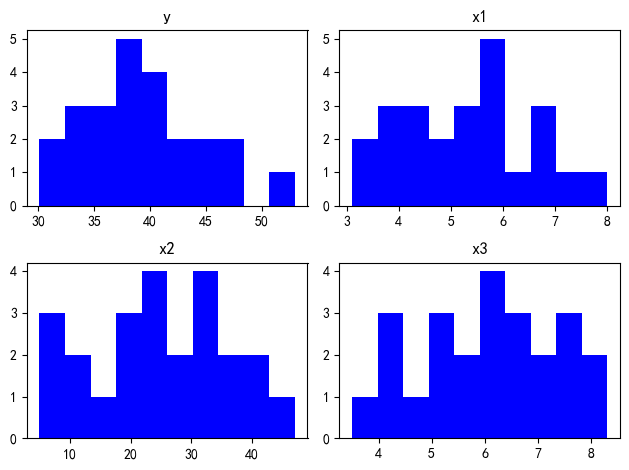

In [4]:
y = data['y'].values
x1 = data['x1'].values
x2 = data['x2'].values
x3 = data['x3'].values

bins = 10
plt.subplot(2, 2, 1)
plt.hist(y, bins, color='blue')
plt.title('y')

plt.subplot(2, 2, 2)
plt.hist(x1, bins, color='blue')
plt.title('x1')

plt.subplot(2, 2, 3)
plt.hist(x2, bins, color='blue')
plt.title('x2')

plt.subplot(2, 2, 4)
plt.hist(x3, bins, color='blue')
plt.title('x3')

plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20858749350>,
 'caps': [<matplotlib.lines.Line2D at 0x2085874ac10>,
 'boxes': [<matplotlib.lines.Line2D at 0x208565563d0>,
 'medians': [<matplotlib.lines.Line2D at 0x208587542d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x20858754dd0>,
 'means': []}

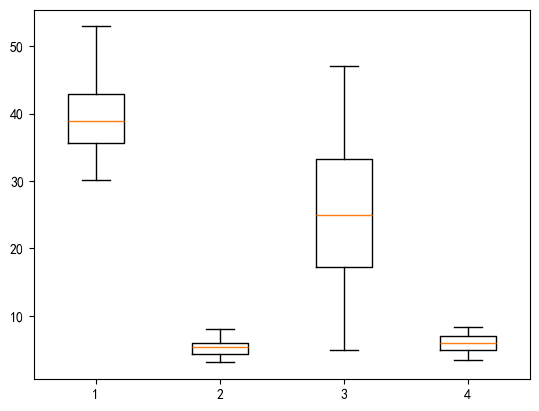

In [5]:
# 箱型图
plt.boxplot([y, x1, x2, x3], label=['y', 'x1', 'x2', 'x3'])

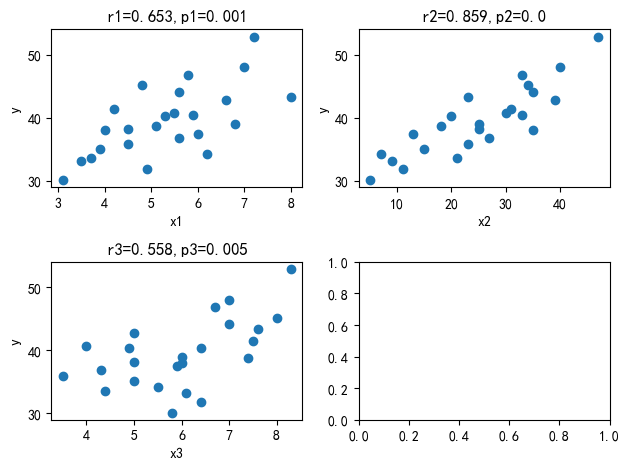

In [6]:
# x与y之间的散点图、相关系数和检验p值
fig, ax = plt.subplots(2, 2)

# x1、y
ax[0, 0].scatter(x1, y)
ax[0, 0].set_xlabel('x1')
ax[0, 0].set_ylabel('y')
r1, p1 = stats.pearsonr(x1, y)
ax[0, 0].set_title('r1='+str(round(r1, 3))+',p1='+str(round(p1, 3)))

# x2、y
ax[0, 1].scatter(x2, y)
ax[0, 1].set_xlabel('x2')
ax[0, 1].set_ylabel('y')
r2, p2 = stats.pearsonr(x2, y)
ax[0, 1].set_title('r2='+str(round(r2, 3))+',p2='+str(round(p2, 3)))

# x3、y
ax[1, 0].scatter(x3, y)
ax[1, 0].set_xlabel('x3')
ax[1, 0].set_ylabel('y')
r3, p3 = stats.pearsonr(x3, y)
ax[1, 0].set_title('r3='+str(round(r3, 3))+',p3='+str(round(p3, 3)))

fig.tight_layout()
plt.show()

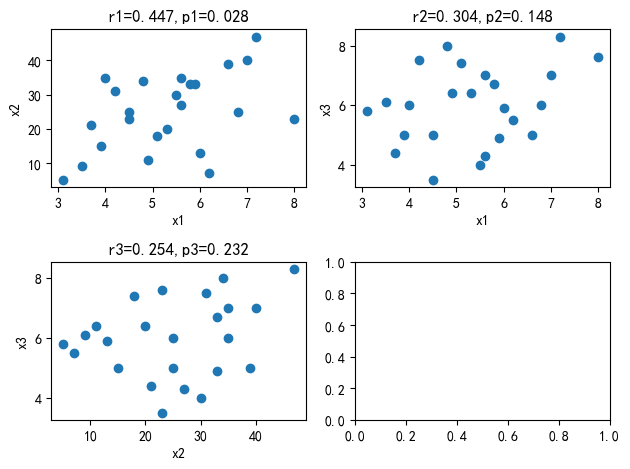

In [7]:
# x之间的散点图、相关系数和检验p值
fig, ax = plt.subplots(2, 2)

# x1、x2
ax[0, 0].scatter(x1, x2)
ax[0, 0].set_xlabel('x1')
ax[0, 0].set_ylabel('x2')
r1, p1 = stats.pearsonr(x1, x2)
ax[0, 0].set_title('r1='+str(round(r1, 3))+',p1='+str(round(p1, 3)))

# x1、x3
ax[0, 1].scatter(x1, x3)
ax[0, 1].set_xlabel('x1')
ax[0, 1].set_ylabel('x3')
r2, p2 = stats.pearsonr(x1, x3)
ax[0, 1].set_title('r2='+str(round(r2, 3))+',p2='+str(round(p2, 3)))

# x2、x3
ax[1, 0].scatter(x2, x3)
ax[1, 0].set_xlabel('x2')
ax[1, 0].set_ylabel('x3')
r3, p3 = stats.pearsonr(x2, x3)
ax[1, 0].set_title('r3='+str(round(r3, 3))+',p3='+str(round(p3, 3)))

fig.tight_layout()
plt.show()


In [8]:
# 回归分析

# 最初数据
y = data['y']
x = data[['x1', 'x2', 'x3']]

# X、Y矩阵
n = len(x)
X = np.ones((n, 4))
X[:, 1:] = x.values
Y = y.values

# 正规方程：beta = (X^T X)^(-1) X^T Y
X_t = X.T
beta = np.linalg.inv(X_t @ X) @ X_t @ Y

# 输出回归系数
print("回归系数 (beta):", beta)
print('Y = %.4f + %.4fX1 + %.4fX2 + %.4fX3'%(beta[0], beta[1], beta[2], beta[3]))

回归系数 (beta): [17.62492547  1.12811702  0.32326938  1.30342999]
Y = 17.6249 + 1.1281X1 + 0.3233X2 + 1.3034X3


In [9]:
# 复相关系数（线性关系显著与否）
ybar = y.mean()
yhat = np.matmul(X, beta)
SST = sum((y-ybar)**2)
SSE = sum((y-yhat)**2)
SSR = SST - SSE
R2 = SSR/SST
print('复相关系数R2 = ', round(R2, 3))

复相关系数R2 =  0.913


In [10]:
# 方差分析表相关数据
df1 = 3 # 自由度1（回归）（p-1）
df2 = n-4 # 自由度2（误差）（n-p）

MSR = SSR / df1
MSE = SSE / df2
F0 = MSR/MSE

p0 = 1 - stats.f.cdf(F0, df1, df2, loc=0, scale=1)

da = [[df1, SSR, MSR, F0, p0], [df2, SSE, MSE], [n-1, SST]]
df = pd.DataFrame(da)
df.columns = ['自由度', '平方和', '均方', 'F值', 'p值']
df.index = ['回归', '误差', '总和']  
df

,自由度,平方和,均方,F值,p值
回归,3,629.307112,209.769037,69.977959,8.802326e-11
误差,20,59.952888,2.997644,NaN,NaN
总和,23,689.260000,NaN,NaN,NaN


In [11]:
# 参数估计（T）
XTX = X_t@X
XTX_inv = np.linalg.inv(XTX)
beta = beta.reshape(4, 1)
b = beta.flatten()

# 标准差估计
s = np.sqrt(MSE*np.diag(XTX_inv)).reshape(4, 1)
s_ = s.flatten()

# 统计量tk的观测值
t0 = np.divide(beta, s)
t0_ = t0.flatten()

# 检验p值
p0_t = 2*(1-stats.t.cdf(np.abs(t0), 18))
p0_t_ = p0_t.flatten()

l = [[b[i], s_[i], t0_[i], p0_t_[i]]for i in range(4)]
L = pd.DataFrame(l)
L.columns = ['参数估计值', '标准差估计', '统计量t', '检验p值']
L.index = ['常数项', 'x1', 'x2', 'x3']
L

,参数估计值,标准差估计,统计量t,检验p值
常数项,17.624925,1.998933,8.817168,5.971808e-08
x1,1.128117,0.325945,3.461062,2.787506e-03
x2,0.323269,0.036315,8.901788,5.184244e-08
x3,1.303430,0.293537,4.440433,3.159263e-04


In [12]:
alpha = 0.05
q = 1 - alpha/2
df = n-4
t_percentile = stats.t.ppf(q, df, loc=0, scale=1)
beta_left = (beta - np.multiply(t_percentile, s)).flatten()
beta_right = (beta + np.multiply(t_percentile, s)).flatten()
print('beta0:', round(beta_left[0], 4), round(beta_right[0], 4))
print('beta1:', round(beta_left[1], 4), round(beta_right[1], 4))
print('beta2:', round(beta_left[2], 4), round(beta_right[2], 4))
print('beta3:', round(beta_left[3], 4), round(beta_right[3], 4))

beta0: 13.4552 21.7946
beta1: 0.4482 1.808
beta2: 0.2475 0.399
beta3: 0.6911 1.9157


In [13]:
# 预测年工资，置信水平95%
# Y = 17.6249 + 1.1281X1 + 0.3233X2 + 1.3034X3
x0 = np.array([1, 1.5, 20, 7.2])
y0_hat = np.matmul(x0, beta)
temp = np.sqrt(MSE*(1+np.matmul(np.matmul(x0.T, XTX_inv), x0)))
y0_left = y0_hat - t_percentile*temp
y0_right = y0_hat + t_percentile*temp


print('y0_hat = ', y0_hat)
print('置信度为95%的置信区间：', round(y0_left[0], 4), round(y0_right[0], 4))

y0_hat =  [35.16718443]
置信度为95%的置信区间： 30.5659 39.7685


In [14]:
# 自编程结果：Y = 17.6249 + 1.1281X1 + 0.3233X2 + 1.3034X3
# 以下调用第三方库
import statsmodels.api as sm

# 设计矩阵
X = data[['x1', 'x2', 'x3']].values
X = sm.add_constant(X)
Y = data['y'].values


model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     69.98
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           8.80e-11
Time:                        09:37:39   Log-Likelihood:                -45.041
No. Observations:                  24   AIC:                             98.08
Df Residuals:                      20   BIC:                             102.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6249      1.999      8.817      0.000      13.455      21.795
x1             1.1281      0.326      3.461      0.002       0.448       1.808
x2             0.3233      0.036      8.902      0.000       0.248       0.399
x3             1.3034      0.294      4.440      0.000       0.691       1.916
==============================================================================
Omnibus:                        0.554   Durbin-Watson:                   2.383
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.418
Skew:                          -0.299   Prob(JB):                        0.811
Kurtosis:                       2.751   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# 预测
x0 = np.array([1, 5.1, 20, 7.2])
y0_hat = results.predict(x0)
y0_hat

array([39.22840569])

In [16]:
# 自编程结果：Y = 17.6249 + 1.1281X1 + 0.3233X2 + 1.3034X3
# 回归系数的估计值
results.params

array([17.62492547,  1.12811702,  0.32326938,  1.30342999])

In [17]:
# 线性回归关系的显著性检验
results.f_pvalue

8.802323262819354e-11

In [18]:
# 回归系数的统计推断
results.tvalues

array([8.81716833, 3.46106152, 8.90178824, 4.44043283])

# 例2.4

In [19]:
filename = 'eg2d3data.xls'
data = pd.read_excel(filename)
data.head()

,y,x1,x2,x3
0,33.2,3.5,9,6.1
1,40.3,5.3,20,6.4
2,38.7,5.1,18,7.4
3,46.8,5.8,33,6.7
4,41.4,4.2,31,7.5


In [20]:
# 简约模型
y_r = data['y'].values
x1_r = data['x1'].values
x2_r = data['x2'].values
x3_r = data['x3'].values
z_r = x1 + x3

# 设计矩阵
n = len(x1_r)
X_r = np.ones((n, 3))
X_r[:, 1] = z_r
X_r[:, 2] = x2_r
Y_r = y_r


# 正规方程
X_r_t = X_r.T
beta_r = np.linalg.inv(X_r_t @ X_r) @ X_r_t @ Y_r

# 回归系数
print('回归系数：', beta_r)
print('简约模型为：Y = %.4f + %.4f(X1+X3) + %.4fX2'%tuple(beta_r))

回归系数： [17.65977534  1.22327452  0.32081584]
简约模型为：Y = 17.6598 + 1.2233(X1+X3) + 0.3208X2


In [21]:
# 简约模型SSE、自由度
ybar = y.mean()
yhat_r = np.matmul(X_r, beta_r)

SSE_r = sum((Y_r - yhat_r)**2)

df_r = len(Y_r) - 3

In [22]:
# 全模型

y_f = data['y']
x_f = data[['x1', 'x2', 'x3']]

# X、Y矩阵
n = len(x)
X_f = np.ones((n, 4))
X_f[:, 1:] = x.values
Y_f = y.values

# 正规方程：beta = (X^T X)^(-1) X^T Y
X_f_t = X_f.T
beta_f = np.linalg.inv(X_f_t @ X_f) @ X_f_t @ Y_f

# 输出回归系数
print("回归系数 (beta):", beta_f)
print('全模型为：Y = %.4f + %.4fX1 + %.4fX2 + %.4fX3'%tuple(beta_f))

回归系数 (beta): [17.62492547  1.12811702  0.32326938  1.30342999]
全模型为：Y = 17.6249 + 1.1281X1 + 0.3233X2 + 1.3034X3


In [23]:
# 全模型SSE、自由度数据
ybar = y.mean()
yhat_f = np.matmul(X_f, beta_f)

SSE_f = sum((Y_f - yhat_f)**2)

df_f = len(Y_f) - 4

In [24]:
# 进行显著性检验

# 检验统计量
F = ((SSE_r - SSE_f)/(df_r - df_f)) / (SSE_f/df_f) 

# p值
p0 = 1 - stats.f.cdf(F, df_r-df_f, df_f, loc=0, scale=1)
print(round(F, 4), round(p0, 4))

0.131 0.7212


可见检验的p值约为0.9857，这个值是比较大的。  
但是否接受原假设$H_0$(认为回归关系可用简约模型描述)，仍然取决于显著性水平$\alpha$的设置。  
> 若$p_0<\alpha$，拒绝$H_0$；  
> 若$p_0\geqslant \alpha$，不拒绝$H_0$

In [25]:

y_f_ = data['y']
x_f_ = data[['x1', 'x2', 'x3']]
x1 = data['x1'].values
x2 = data['x2'].values
x3 = data['x3'].values
x1x2 = np.multiply(x1, x2)
x1x3 = np.multiply(x1, x3)
x2x3 = np.multiply(x2, x3)

# X、Y矩阵
n = len(x)
X_f_ = np.ones((n, 4+3))
X_f_[:, 1:-3] = x.values
X_f_[:, -3] = x1x2
X_f_[:, -2] = x1x3
X_f_[:, -1] = x2x3
Y_f_ = y.values


# 正规方程：beta = (X^T X)^(-1) X^T Y
X_f__t = X_f_.T
beta_f_ = np.linalg.inv(X_f__t @ X_f_) @ X_f__t @ Y_f_

# 输出回归系数
print("回归系数 (beta):", beta_f_)
print('全模型为：Y = %.4f + %.4fX1 + %.4fX2 + %.4fX3 + %.4fX1X2 + %.4fX1X3 + %.4fX2X3'%tuple(beta_f_))

回归系数 (beta): [ 2.64781807e+01  1.16057667e+00 -2.23714491e-02 -8.10410559e-02
  5.75153811e-03 -1.49731480e-02  4.95143251e-02]
全模型为：Y = 26.4782 + 1.1606X1 + -0.0224X2 + -0.0810X3 + 0.0058X1X2 + -0.0150X1X3 + 0.0495X2X3


In [26]:
# 全模型及自由度
yhat_f_ = np.matmul(X_f_, beta_f_)
SSE_f_ = sum((Y_f_ - yhat_f_)**2)

df_f_ = len(Y_f_) - 7


In [27]:
# 检验统计量F及p值
F_ = ((SSE_f  -SSE_f_)/(df_f - df_f_)) / (SSE_f_/df_f_)
p0_ = 1 - stats.f.cdf(F_, df_f-df_f_, df_f_, loc=0, scale=1)

print(F_, p0_)

0.7647974820845006 0.5293241801293289


## 1、$\beta$的最小二乘估计及是否为无偏估计
### （1）最小二乘估计
令误差项的平方和达到最小，以此来求$\beta$的最小二乘估计
> 求解目标为：min $S(\beta) = \sum_{i=1}^n{(y_i- \hat{\beta}x_i)^2}$  
> 对目标函数$\beta$求导并令导数等于零，即得:  
> > $ \frac{\partial S(\beta)}{\partial \beta} = \sum_{i=1}^n{-2x_i(y_i-\hat{\beta}x_i)}=0$
> > 
> > $ \sum_{i=1}^n{-2x_i y_i + 2\beta x_i^2} = 0$
> > 
> > $ \sum_{i=1}^n{x_i^2 \beta}=\sum_{i=1}^n{x_i y_i}$
> > 
> > 可以写成矩阵形式（事实上只有一维），即：
> > 
> > $ X^T X \beta = X^T Y$
> >
> > **因此可得$\beta$的最小二乘估计为：**
> >
> > **$ \hat{\beta} = \frac{\sum_{i=1}^n{x_i y_i}}{\sum_{i=1}^n{x_i^2}} = (X^T X)^{-1}X^T Y$**
> >
> > 即$\hat{Y} = \hat{\beta}X$

### （2）检验是否无偏  
无偏估计即估计量的期望等于被估计量的真实值，依题目可知，在这个线性回归模型中有$ E(Y) = X\beta$,则有如下计算：  
> $ E(\hat{\beta}) = E((X^T X)^{-1}X^T Y) = (X^T X)^{-1}X^T E(Y) = (X^T X)^{-1}X^T X\beta = \beta$
> 
> **因此，$ \hat{\beta}$  是  $\beta$的无偏估计**

## 2、误差方差$\sigma^2$的无偏估计
构造残差向量：$\hat{\varepsilon} = Y-\hat{Y}$  
> 其中，有第1问中推出的信息可知：
> 
> $\hat{\varepsilon} = Y - X\hat{\beta} = Y - X(X^T X)^{-1} X^T Y$
>
> 令$H = X(X^T X)^{-1} X^T$，则有：
>
> $\hat{\varepsilon} = Y - HY = (I-H)Y = (I-H)(X\beta+\varepsilon)$
>  
> 显然有$HX = X(X^T X)^{-1} X^T X = X$，即$ (I-H)X=0$  
>
> 得：
>
> $\hat{\varepsilon} = (I-H)\varepsilon$，且有$(I-H)$对称幂等
> 
则有残差平方和：  
> $ SSE = \sum_{i=1}^n{(y_i-\hat{y_i})^2} = \hat{\varepsilon}^T{\varepsilon} = ((I-H)\varepsilon)^T((I-H)\varepsilon) = \varepsilon^T(I-H)\varepsilon$
>
> 可以计算期望：
>
> $E(SSE) = E(\varepsilon^T(I-H)\varepsilon) = E(tr[\varepsilon^T(I-H)\varepsilon]) = E(tr[(I-H)\varepsilon\varepsilon^T]) = tr[(I-H)E(\varepsilon\varepsilon^T)]$
>
> 即得：
>
> $E(SSE) = \sigma^2 tr[I-H] = \sigma^2 (n-1)$
>
> 得：
>
> **$\hat{\sigma}^2 = \frac{SSE}{n-1} = \frac{\sum_{i=1}^n{(y_i-\hat{y_i})^2}}{n-1}$为$\sigma^2$的无偏估计**

# 2.4

In [28]:
filename = 'ex2_4data.xls'
data = pd.read_excel(filename, header=None)
data.columns=['y', 'x1', 'x2']
data.head()

,y,x1,x2
0,162,274,2450
1,120,180,3254
2,223,375,3802
3,131,205,2838
4,67,86,2347


## 1、（1）回归系数的最小二乘估计

In [29]:
# X、Y矩阵
Y = data['y'].values
n = len(Y)
x = data[['x1', 'x2']]
X = np.hstack((np.ones((n, 1)), x.values))

# 正规方程
X_t = X.T
beta = np.linalg.inv(X_t @ X) @ X_t @ Y
print('回归系数：', beta)
print('回归方程：Y = %.4f + %.4f X1 + %.4f X2'%tuple(beta))

回归系数： [3.45261279 0.49600498 0.00919908]
回归方程：Y = 3.4526 + 0.4960 X1 + 0.0092 X2


## 1、（2）误差方差$\sigma^2$的估计

In [30]:
y_hat = np.matmul(X, beta)
SSE = sum((Y-y_hat)**2)

n = len(Y)
p = 3

s2 = SSE/(n-p)
print('误差方差s2的估计为：', round(s2,4)) 

误差方差s2的估计为： 4.7403


## 2、（1）方差分析表

In [31]:
y_bar = Y.mean()
y_hat = np.matmul(X, beta)

# 方差来源：回归
df1 = 3 - 1
SSE = sum((Y-y_hat)**2)
SST = sum((Y-y_bar)**2)
SSR = SST - SSE
MSR = SSR/df1

# 方差来源：误差
df2 = len(Y) - 3
MSE = SSE/df2

# F、p0
F = MSR / MSE
p0 = 1 - stats.f.cdf(F, df1, df2, loc=0, scale=1)

List = [['回归', df1, SSR, MSR, F, p0], ['误差', df2, SSE, MSE], ['总和', len(Y)-1, SST]]
df = pd.DataFrame(List)
df.columns=['方差来源', '自由度', '平方和', '均方', 'F值', 'p值']
df

,方差来源,自由度,平方和,均方,F值,p值
0,回归,2,53844.716434,26922.358217,5679.466388,1.110223e-16
1,误差,12,56.883566,4.740297,NaN,NaN
2,总和,14,53901.600000,NaN,NaN,NaN


## 2、（3）对回归关系的显著性检验及复相关系数

In [32]:
R2 = 1 - SSE/SST
print('复相关系数为：', round(R2, 4))

复相关系数为： 0.9989


上述计算过程中运用的公式如下：  
> $SST=\sum_{i=1}^n{(y_i-\overline{y})^2}$  
>
> $SSE=\sum_{i=1}^n{(y_i-\hat{y_i})^2}$  
>
> $SSR=\sum_{i=1}^n{(\hat{y_i}-\overline{y})^2}$  
>
> $SST = SSE+SSR$
>
> SSE是残差平方和，反映的是除了拟合值$\beta_i$以外的其他因素引起的变化
> 
> SSR是回归平方和，反映了自变量的线性函数在各组观测值处取值的离差平方和
> 
> SST即总离差平方和，SSR越大，线性函数观测值（拟合系数线性组合）所能描述的SST的比例越大,即$Y与X_i$之间的线性关系越显著
> 
> 因此，利用复相关系数$R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}$来衡量回归模型的拟合优度，$R^2$愈大，$Y与X_i$的线性关系越显著  

上述计算结果$R^2\approx0.9989$，认为$Y与X_1、X_2$之间的线性关系显著

## 3、$\beta_1和\beta_2$置信度为95%的置信区间

In [33]:
# 标准差的估计
XTX = X_t @ X
XTX_inv = np.linalg.inv(XTX)
beta = beta.reshape(3, 1)
s = np.sqrt(MSE*np.diag(XTX_inv)).reshape(3, 1)

alpha = 0.05
q = 1 - alpha/2
df = len(Y) - 3
t_percnetile = stats.t.ppf(q, df, loc=0, scale=1)
beta_left = (beta - np.multiply(t_percentile, s)).flatten()
beta_right = (beta + np.multiply(t_percentile, s)).flatten()
print('beta：',beta.flatten())
print('beta0：', round(beta_left[0], 4), round(beta_right[0], 4))
print('beta1：', round(beta_left[1], 4), round(beta_right[1], 4))
print('beta2：', round(beta_left[2], 4), round(beta_right[2], 4))

beta： [3.45261279 0.49600498 0.00919908]
beta0： -1.6176 8.5229
beta1： 0.4834 0.5086
beta2： 0.0072 0.0112


## 4、（1）检验人数和收入对销量的影响

In [34]:
# 回归方程：Y = 3.4526 + 0.4960 X1 + 0.0092 X2

# 标准差估计
s = np.sqrt(MSE*np.diag(XTX_inv)).reshape(3, 1)
# 统计量tk的观测值
t0 = np.divide(beta, s)
# 检验p值
p0_t = 2*(1 - stats.t.cdf(np.abs(t0), len(Y)-3))

da = np.ones((3, 4))


da[0:, 0] = beta.flatten()
da[0:, 1] = s.flatten()
da[0:, 2 ] = t0.flatten()
da[0:, 3] = p0_t.flatten()
df = pd.DataFrame(da)
df.columns = ['参数估计值', '标准差估计', '统计量的值', '检验p值']
df.index = ['常数项', 'X1', 'X2']
df


,参数估计值,标准差估计,统计量的值,检验p值
常数项,3.452613,2.430650,1.420448,1.809353e-01
X1,0.496005,0.006054,81.924155,0.000000e+00
X2,0.009199,0.000968,9.502065,6.201181e-07


题中设置显著性水平$\alpha=0.05$，由计算结果可见，最后一列的$X_1、X_2$的p值都小于显著性水平$\alpha$，即认为人数、收入对销量影响显著

## 4、（2）检验$X_1和X_2$的交互作用对$Y$的影响是否显著

In [35]:
X1_ = data['x1'].values
X2_ = data['x2'].values
Z = np.multiply(X1_, X2_) # X1*X2

# X、Y矩阵
Y_ = data['y'].values
n = len(Y)
x_ = data[['x1', 'x2']]
X_ = np.ones((n, 4))
X_[:, 1:-1] = x_.values
X_[:, -1] = Z

# 正规方程
X__t = X_.T
beta_ = np.linalg.inv(X__t @ X_) @ X__t @ Y
print('回归系数：', beta_)
print('回归方程：Y = %.6f + %.6f X1 + %.6f X2 + %.6f X1X2'%tuple(beta_))


回归系数： [4.90112802e+00 4.91101255e-01 8.67389787e-03 1.69766956e-06]
回归方程：Y = 4.901128 + 0.491101 X1 + 0.008674 X2 + 0.000002 X1X2


### 这时候全模型为引入交叉项后的回归方程，简约模型为上面第一问计算得到的回归方程

In [36]:
# 检验
y__bar = Y_.mean()
y__hat = np.matmul(X_, beta_)

df_f = len(Y_)-4
SSE_f = sum((Y_-y__hat)**2)

df_r = len(Y)-3
SSE_r = SSE
F = ((SSE_r-SSE_f)/(df_r-df_f))/(SSE_f/df_f)

p0 = 1 - stats.f.cdf(F, df_r-df_f, df_f, loc=0, scale=1)
print(round(F, 4), round(p0, 4))

0.0316 0.8622


此时计算得到的$p\approx0.8622>95\% $(题目设置的置信度为95%)，不认为$X_1、X_2$的交互作用对Y影响显著

## 5、预测及置信区间

In [37]:
x0 = np.array([1, 220, 2500])
y0_hat = np.matmul(x0, beta)

temp = np.sqrt(MSE*(1+np.matmul(np.matmul(x0.T, XTX_inv), x0)))
y0_left = y0_hat - t_percentile*temp
y0_right = y0_hat + t_percentile*temp

print('销量的预测值y0_hat = ', y0_hat)
print('置信度为95%的置信区间：', round(y0_left[0], 4), round(y0_right[0], 4))

销量的预测值y0_hat =  [135.5714097]
置信度为95%的置信区间： 130.8116 140.3312
